# Part 2: Exercises

### Ex 2.1 K-NN
The goal is to plot the accuracy of a K-NN classifier with respect to the hyperparameter K.

As usual we start by loading the libraries we'll need and creating some artificial data. 

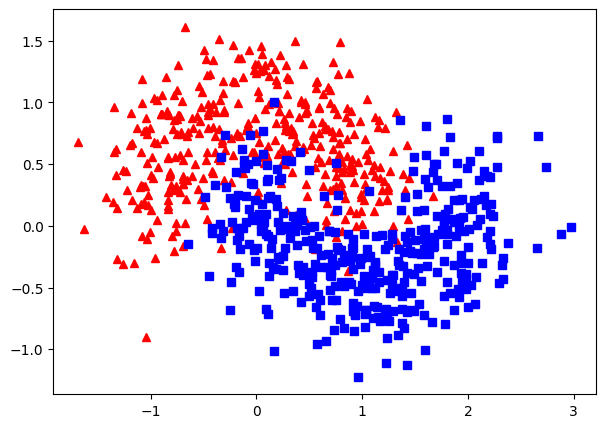

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# scikit
from sklearn.datasets import make_moons                 # to create fake dataset
from sklearn.neighbors import KNeighborsClassifier      # implemented K-NN
from sklearn.model_selection import train_test_split    # split train,validation and test st
from sklearn.metrics import accuracy_score              # function for accuracy


X, y = make_moons(n_samples=750, noise=0.3, random_state=123)   # dataset with random seed
                                                                # X = 2D pts, y = layers
fig = plt.figure(figsize=(7,5))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')    # pts with y=0 are red (X[:,0] means first component, X[:,1] second)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')    # pts with y=1 are blue
plt.show()

We split the data into train and test sets in such a way that 30% of the data  goes into the train set. 

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=123)

We want to compute the accuracy (ratio of correct predictions over the total number of predictions, error=1-accuracy ) on the train and test sets of a K-NN model for 80 values of K. Let's create two lists to keep the accuracy values and make a list of the K values

In [3]:
accuracy_values_train = []
accuracy_values_test = []
k_values = range(1, 80)

For each *k_values*, fit a K-NN model on the train set and add the accuracy on the train and test sets to the lists *accuracy_values_train*

In [4]:
for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  accuracy_values_train.append(accuracy_score(y_pred_train, y_train))
  accuracy_values_test.append(accuracy_score(y_pred_test, y_test))

We can finally plot the accuracy values on train and test with respect to K

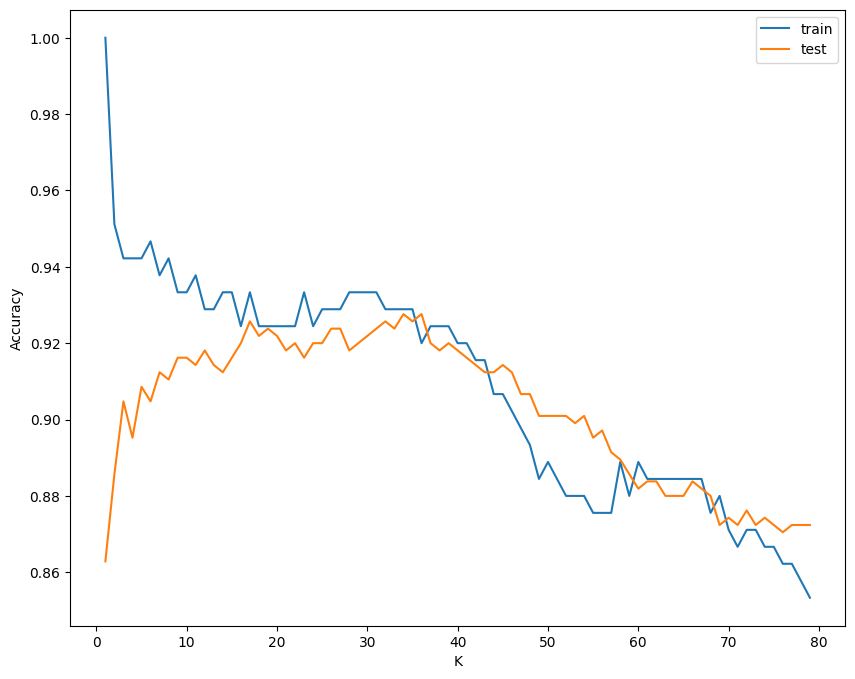

In [5]:
fig = plt.figure(figsize=(7,5))
plt.plot(k_values, accuracy_values_train, label="train")
plt.plot(k_values, accuracy_values_test, label="test")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Ex 2.2 Logistic Regression

Use Scikit-Learn to train a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a> over the dataset called *sonar*. 

In [6]:
from sklearn.linear_model import LogisticRegression

# DATA
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
ds = pd.read_csv(url, header = None)

# split into input X and output y elements
data = ds.values
X_sonar, y_sonar = data[:, :-1], data[:, -1]

**EX 2.2.1** Print the shapes of our arrays $X$ and $y$.

In [7]:
print(X_sonar.shape, y_sonar.shape)

(208, 60) (208,)



**EX 2.2.2** We ask you to create three partitions:


*   *train set* : a set of samples used to train a model.
*   *val set*: a set of samples used to decide the best model.
*   *test set*: a set of samples used to see our best model performance. 

We now first split samples that we can use in our training (train and val), from samples that we cannot touch (test). <br>
Create a split between train_val and test, by maintaining the 25% of samples in the test set.

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_sonar, y_sonar, 
                                                  train_size = 0.75, random_state = 123)


From the train_val variables, split train and validation sets. Maintain the 10% of samples in the validation.


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  train_size = 0.9, random_state = 123)


Let's check the shape of these sets:

In [10]:
print(X_train.shape, X_val.shape, X_test.shape)

(140, 60) (16, 60) (52, 60)


**EX 2.2.3** Sklearn uses a different name $C$ for regularization parameter. It's in relation with $\lambda$ as follow:

$\lambda=\frac{1}{C}$

And its default value is 1 (so same is $\lambda$).


Train and evaluate (using accuracy) a logistic regression with the default value for the hyperparameter. Do the evaluation **only** on the training and validation partitions. 

In [11]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# estimation (y_hat)
y_train_pred_lr = clf_lr.predict(X_train)
y_val_pred_lr = clf_lr.predict(X_val)

print(f"Logistic Regression.\tTrain ACC: {accuracy_score(y_train, y_train_pred_lr)}")
print(f"Logistic Regression.\tVal ACC: {accuracy_score(y_val, y_val_pred_lr)}")

Logistic Regression.	Train ACC: 0.8714285714285714
Logistic Regression.	Val ACC: 0.75


**EX 2.2.4**  This time we do not reach the 100% of accuracy in both training and validation set. <br>
A good strategy is to apply a grid-search, i.e., find a sub-optimal hyperparameters. <br>
We ask you to find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10, 100]$.

In [12]:
C = [0.001, 0.01, 0.1, 1., 10, 100]
for c in C:
    clf_lr = LogisticRegression(C = c, max_iter = 200)
    clf_lr.fit(X_train, y_train)

    # estimation (y_hat)
    y_train_pred_lr = clf_lr.predict(X_train)
    y_val_pred_lr = clf_lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc:.16f}\tVal Acc: {val_acc:.16f}")

LR. C= 0.001.	Train ACC: 0.5500000000000000	Val Acc: 0.3125000000000000
LR. C= 0.01.	Train ACC: 0.5857142857142857	Val Acc: 0.3125000000000000
LR. C= 0.1.	Train ACC: 0.7500000000000000	Val Acc: 0.5000000000000000
LR. C= 1.0.	Train ACC: 0.8714285714285714	Val Acc: 0.7500000000000000
LR. C= 10.	Train ACC: 0.8785714285714286	Val Acc: 0.7500000000000000
LR. C= 100.	Train ACC: 0.9357142857142857	Val Acc: 0.7500000000000000


**Ex 2.2.5** The default parameter seems to work fine. <br>
We might want to extend the search in a smaller range: $C=[0.1, 0.5, 1, 5, 10, 15, 20] $

In [13]:
C=[0.1, 0.5, 1, 5, 10, 15, 20]
for c in C:
    clf_lr = LogisticRegression(C = c, max_iter = 200)
    clf_lr.fit(X_train, y_train)

    # estimation (y_hat)
    y_train_pred_lr = clf_lr.predict(X_train)
    y_val_pred_lr = clf_lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc:.16f}\tVal Acc: {val_acc:.16f}")

LR. C= 0.1.	Train ACC: 0.7500000000000000	Val Acc: 0.5000000000000000
LR. C= 0.5.	Train ACC: 0.8428571428571429	Val Acc: 0.6875000000000000
LR. C= 1.	Train ACC: 0.8714285714285714	Val Acc: 0.7500000000000000
LR. C= 5.	Train ACC: 0.8714285714285714	Val Acc: 0.7500000000000000
LR. C= 10.	Train ACC: 0.8785714285714286	Val Acc: 0.7500000000000000
LR. C= 15.	Train ACC: 0.8928571428571429	Val Acc: 0.7500000000000000
LR. C= 20.	Train ACC: 0.9000000000000000	Val Acc: 0.7500000000000000


There is no much difference, but we find sub-optimal values with $C= [1, 5, 10, 20$]. <br>
Note that while the training performance vary, the validation set is the same between these four values.   

**Ex 2.2.6** You might want to see what happen when we do not fit the intercept. To do so, we should try both combinations (i.e., true and false) for the parameters, but by combining all the possible C we found up to now. <br>
Python-related speaking, this is translated into an inner loop:

    for c in [0.1, 0.5, 1, 5, 10, 15, 20]:
        for fi in [True, False]:
            #here we train and test our model

If we want to find the sub-optimal amond three hyper-parameters, we must add another inner loop. And so on... <br>

In [14]:
C=[0.1, 0.5, 1, 5, 10, 15, 20]
FI = [True, False]

best_C = None
best_fi = None
best_train_acc = 0.
best_val_acc = 0.

for c in C:
    for fi in FI:
        clf_lr = LogisticRegression(C = c, fit_intercept= fi)
        clf_lr.fit(X_train, y_train)

        # estimation (y_hat)
        y_train_pred_lr = clf_lr.predict(X_train)
        y_val_pred_lr = clf_lr.predict(X_val)

        tr_acc = accuracy_score(y_train, y_train_pred_lr)
        val_acc= accuracy_score(y_val, y_val_pred_lr)

        if val_acc > best_val_acc:
            best_C = c
            best_fi = fi
            best_train_acc = tr_acc
            best_val_acc = val_acc

print(f"Found the best model with C: {best_C}\t\t\tFit Intercept: {best_fi}")
print(f"Best training acc: {best_train_acc}\t\tBest val acc: {best_val_acc}")

Found the best model with C: 1			Fit Intercept: True
Best training acc: 0.8714285714285714		Best val acc: 0.75


### Ex 2.3 Grid Search Cross-Validation

In the previous exercise, we implemented a grid search manually. The more hyper-parameters, the harder to implement. <br>
Scikit-learn eases our pain, and it offers a grid-search cross-validation function that does everything for us! <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html"> [link]</a>.<br>

In [15]:
from sklearn.model_selection import GridSearchCV    # import the library

The first thing to do is to define a dictionary containing the hyper-parameters with the range of values we want to search on. 

In [16]:
param_grid_test = {
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],
    'fit_intercept': [True, False]
}

Then, we create the grid-search object.

In [17]:
# target classifier
lr = LogisticRegression()

# grid-search object
clf = GridSearchCV(estimator= lr, param_grid=param_grid_test, 
                   cv = 5, scoring = "accuracy")

Note that the tool already refit the best found model in the entire dataset (i.e., train and validation). <br>


In [18]:
# Example
from sklearn import datasets
X_toy, y_toy = datasets.make_blobs(n_samples=150,n_features=2, centers=2,cluster_std=1.05, random_state=2)
y_toy[y_toy==0]=-1

# fit the model
clf.fit(X_toy, y_toy) # we do not use the train - validation split strategy since it is included in the CV procedure

# see the best parameters and performance
print(clf.best_params_)
print(clf.best_score_)


{'C': 0.1, 'fit_intercept': True}
1.0


**Ex 2.3.1** Implement a grid-search CV with 10 fold for the *sonar* dataset.

In [19]:
# define the parameters grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],
    'fit_intercept': [True, False]
}

# target classifier
lr = LogisticRegression()

# grid-search object
clf = GridSearchCV(estimator= lr, param_grid=param_grid, cv = 10, scoring = "accuracy")

# fit the model
clf.fit(X_train_val, y_train_val) # we do not use the train - validation split strategy since it is included in the CV procedure

# see the best parameters and performance
print(clf.best_params_)
print(clf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 15, 'fit_intercept': False}
0.7883333333333333


you should see the following error: 

    *ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT*

**Ex 2.3.2** To fix it, we can set the parameter max_iter=200 in the LogisticRegression. Re-execute the previous code with this new parameter.  

In [20]:
# define the parameters grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],
    'fit_intercept': [True, False]
}

# target classifier
lr = LogisticRegression(max_iter = 200)

# grid-search object
clf = GridSearchCV(estimator= lr, param_grid=param_grid, cv = 10, scoring = "accuracy")

# fit the model
clf.fit(X_train_val, y_train_val) # we do not use the train - validation split strategy since it is included in the CV procedure

# see the best parameters and performance
print(clf.best_params_)
print(clf.best_score_)

{'C': 15, 'fit_intercept': False}
0.7883333333333333


The grid-search cv returns a different Logistic Regression model, with $C=15$ and *fit_intercept=False*.  <br>

**Ex 2.3.3** It's time to see this best model on the test set. Use the accuracy as evaluation metric.

In [21]:
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7884615384615384


### Ex 2.4: Homemade perceptron

Understand underlying mechanism of already made libraries. 

In this exercise, we try to implement a perceptron using only *numpy*.

In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets

# let's build a custom dataset
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


**EX 2.4.1** Modify the $y$ vector such that the labels are $\{-1,  1\}$ instead of $\{0, 1\}$ for Perceptron. 

In [23]:
y[y==0] = -1

print(y)

[ 1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1  1
  1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1
 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  1  1]


We also plot how the data looks like; in particular, we can see two different colours, one per class.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

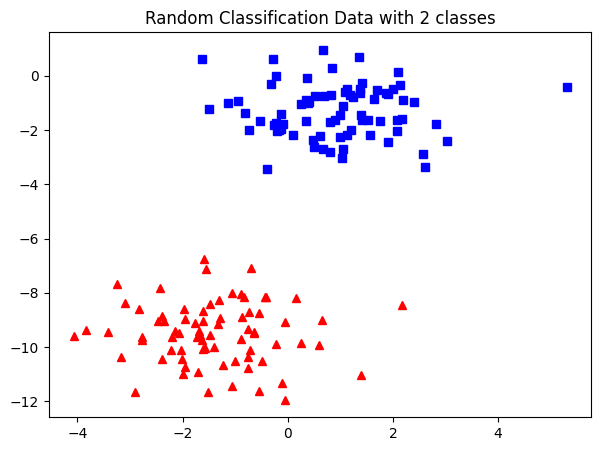

In [24]:
# Plotting
fig = plt.figure(figsize=(7,5))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.title('Random Classification Data with 2 classes')

**EX 2.4.2** Create two variables $m,n$ that represent the number of examples and the number of features, respectively. Get those values from $X$. 


In [25]:
m, n = X.shape
print(m, n) 

150 2


**EX 2.4.3** We now create a numpy array $\theta$ that contains the parameters of our perceptron. <br>

Create a numpy array *theta* filled with zero values (you should be able to determine the correct size). <br>


In [26]:
theta = np.zeros(n + 1) # we consider the +1 since we need to insert the bias as well
print(theta,'\n')
print(theta.shape)

[0. 0. 0.] 

(3,)


**EX 2.4.4** Add the *bias* vector to $X$ as well: create a new matrix $X_{mat}$ $(m , 3)$, where the first column is set to $1$, the second and third are our $X$. 

In [27]:
X_mat = np.hstack((np.ones((m, 1)), X))
print(X_mat[:5, :])

[[  1.          -0.53278301  -1.64847081]
 [  1.          -0.55022637 -11.61661524]
 [  1.           1.38862276  -1.4358059 ]
 [  1.           1.37033956  -0.64022071]
 [  1.          -0.88060639  -9.7094674 ]]


**EX 2.4.5** Write a function called *perceptron_v1* that, given $X_{mat}$, $y$ and $\theta$, updates $\theta$ using the **perceptron** algorithm we saw in class during one of the previous lectures. <br>
**Bonus**: we say that one algorithm has run for an epoch once it has seen (considered) all the examples in the training set once. Add a parameter  max_epochs to perceptron\_v1 which stops the perceptron if it has not converged after max_epochs epochs.  

The function returns the updated $\theta$ vector and the number of epochs it has been executed. 

In [28]:
def perceptron_v1(X_mat, y, theta, max_epochs):
  m = X_mat.shape[0] # number of examples in the training set
  num_epochs = 0
  num_errors = 1
  while num_epochs <= max_epochs and num_errors > 0: # we keep iterating over the data until 
                                                     # we make no mistake or we reach the maximum number of iterations
    num_epochs = num_epochs + 1
    num_errors = 0
    for i in range(m):
      #get the current sample
      X_i = X_mat[i, :] # @ (3, 1) = (1, 1) ~ real value
      y_i = y[i]
      y_hat = X_i.dot(theta)
      #predict the label of the ith-example
      if y_hat * y_i <= 0: 
        theta += y_i*X_i # the prediction is wrong, we update the theta
        num_errors = num_errors + 1 
  return theta, num_epochs


theta, num_epochs = perceptron_v1(X_mat, y, theta, 30)
print(theta, '\n', num_epochs)

[10.          1.4885954   1.69384333]


Now write a function _perceptron_predict_ that computes the predictions of a trained (we know the best $\theta$ Perceptron on a dataset, returning a vector (list) of {-1,1} values. The parameters of the function are the dataset and the theta values. Apply _perceptron_predict_ to X_mat, theta: y_pred = perceptron_predict(X_mat, theta)

In [29]:
def perceptron_predict(X_mat, theta):
  y_pred = []
  for i in range(X_mat.shape[0]):
    score = X_mat[i,:].dot(theta)
    if score>0:
      y_pred.append(1)
    else:
      y_pred.append(-1)
  return y_pred


def perceptron_predict_v2(X_mat, theta): # this version uses matrix notation
  y_pred = X_mat.dot(theta)
  y_pred[y_pred>0] = 1
  y_pred[y_pred<=0] = -1
  return y_pred     # in some implementation, must use.flatten() 
                    # numpy treats differently matrices of dimension (n,1) and vectors of size n; 
                    # here y_pred is a matrix - if you type y_pred.shape before applying flatten you get (150,1) -
                    # but we want to convert it to a vector - if you type y_pred.shape after flatten you get (150,) - 
                    # because we will compare to another vector, y, to compute the accuracy of the perceptron. 

y_pred = perceptron_predict_v2(X_mat, theta)


**EX 2.4.6** Define a function called *accuracy_score* that, given the ground truth and a vector of predictions, it returns the accuracy score. <br>
We define the accuracy as the number of correct predictions, divided by the total number of predictions. <br>
Calculate the accuracy score among the previous perceptron execution.

In [30]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(accuracy_score(y,y_pred))

1.0


We can finally plot the decision boundary obtained so far.

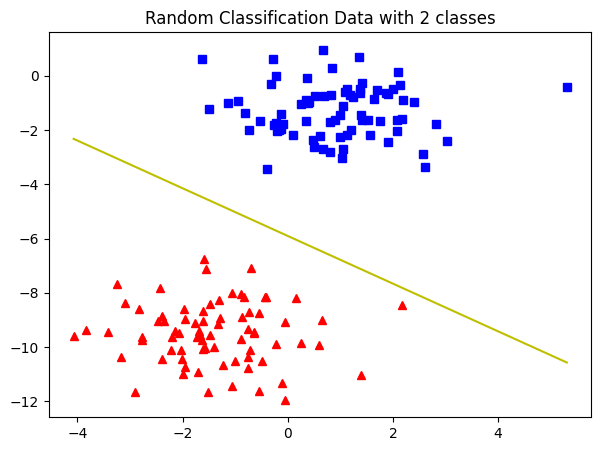

In [31]:
# Plotting
fig = plt.figure(figsize=(7,5))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.title('Random Classification Data with 2 classes')

# ADD THE DECISION BOUNDARY
# The Line is y=mx+c
x1 = np.array([min(X[:,0]), max(X[:,0])])
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m * x1 + c
plt.plot(x1, x2, 'y-')